The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


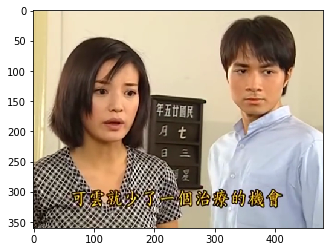

In [4]:
%load_ext autoreload
%autoreload 2

from skimage import io, color
import torch
from dataset.color_sampling import sample_color_hints
import matplotlib.pyplot as plt

device = torch.device('cuda')

frames = torch.randint(low=1, high=5000, size=[2])
original1 = io.imread(f'../../../datasets/train/qing-ep17-{frames[0]:05d}.png')

lab1 = torch.tensor(color.rgb2lab(original1), device='cuda').permute(2, 0, 1)

L_channel = lab1[[0]]
ab_channels = lab1[1:]
ab_hint, ab_mask, bounding_boxes = sample_color_hints(ab_channels)

plt.figure()
plt.imshow(original1)

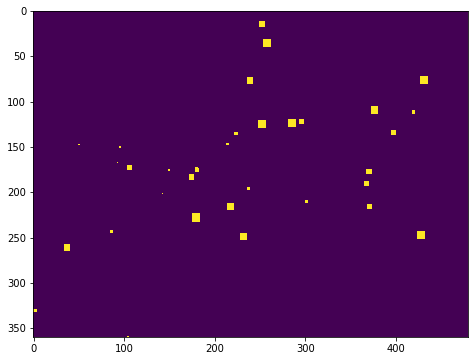

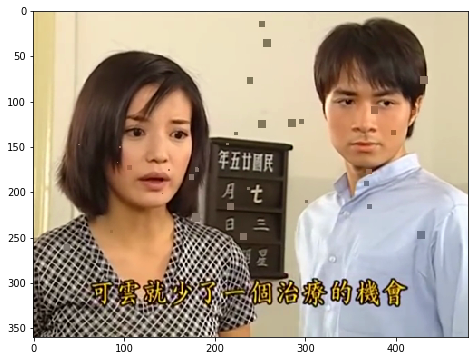

In [5]:
plt.figure(figsize=(8, 6))
plt.imshow(ab_mask[0].cpu().numpy())

stacked_ab_mask = torch.cat((ab_mask, ab_mask), dim=0)
L_hint = torch.ones_like(L_channel) * 50
replaced_ab_channels = torch.where(stacked_ab_mask > 0, ab_hint, ab_channels)
replaced_L_channel = torch.where(ab_mask > 0, L_hint, L_channel)
replaced_batch = torch.cat((replaced_L_channel, replaced_ab_channels), dim=0)
replaced_batch = replaced_batch.permute(1, 2, 0).cpu().numpy()
replaced_img1 = color.lab2rgb(replaced_batch)

plt.figure(figsize=(8, 6))
plt.imshow(replaced_img1)
